In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from matplotlib.pyplot import figure
import time
import json

In [22]:
base_path = r'C:\Users\Tony Ho\Downloads\TSS_LRD\s9\LRDP1Z1'
os.listdir(base_path)

['lrd_p1_1a_s9.csv',
 'lrd_p1_1b_s9.csv',
 'lrd_p1_1c_s9.csv',
 'lrd_p1_1d_s9.csv',
 'lrd_p1_1e_s9.csv']

In [6]:
#df = pd.read_csv(r'C:\Users\Tony Ho\Downloads\TSS_LRD\s9\LRDP1Z1\lrd_p1_1a_s9.csv',skiprows=4)
#df = pd.read_csv(r'C:\Users\Tony Ho\Downloads\lrd_p1_a1_s9.csv',skiprows=4)
df = pd.read_csv(r'C:\Users\user\Downloads\TSS_LRD\s9\LRDP1Z1\lrd_p1_1a_s9.csv',skiprows=4)
df = df[['UID','RECEIVED TIME','RSSI']]
df['RECEIVED TIME'] = pd.to_datetime(df['RECEIVED TIME'])
#count the duration of data-taking
diff = (df['RECEIVED TIME'].iloc[-1]-df['RECEIVED TIME'].iloc[0]).total_seconds()
#create the time series as no missing RSSI
dti = pd.date_range(df['RECEIVED TIME'].iloc[0], periods=diff,freq='S')
dti = dti.to_frame(name='time')
dti['time_delta'] = ((dti['time']-dti['time'].iloc[0])/np.timedelta64(1, 's')).astype(int)

In [7]:
beacon1 = [146,147]
beacon2 = [148,149]
beacon3 = [150,151]
df_merge1 = dti.merge(df[df.UID.isin(beacon1)], how='outer', left_on='time',right_on='RECEIVED TIME')
df_merge1['RSSI'].fillna(-100, inplace=True)
df_merge2 = dti.merge(df[df.UID.isin(beacon2)], how='outer', left_on='time',right_on='RECEIVED TIME')
df_merge2['RSSI'].fillna(-100, inplace=True)
df_merge3 = dti.merge(df[df.UID.isin(beacon3)], how='outer', left_on='time',right_on='RECEIVED TIME')
df_merge3['RSSI'].fillna(-100, inplace=True)

In [13]:
x = df_merge1.UID.unique()
x = x[~np.isnan(x)]
x

array([147., 146.])

No handles with labels found to put in legend.


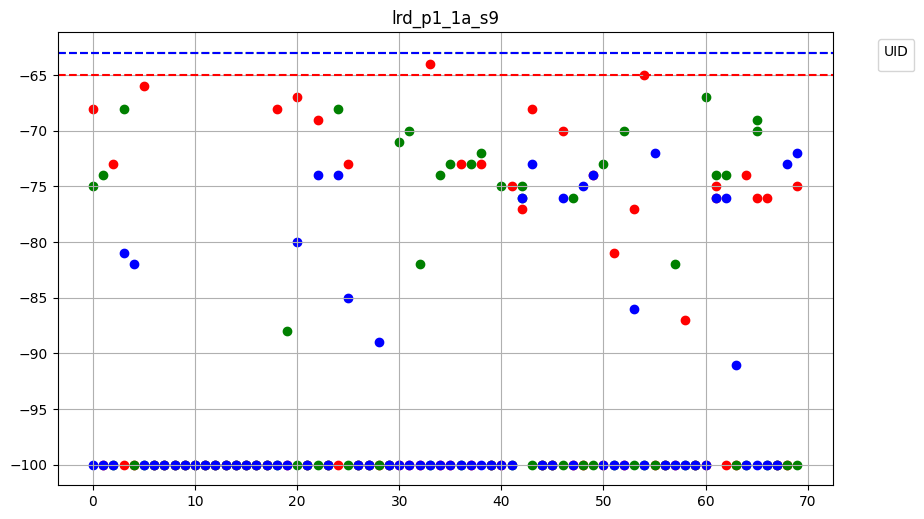

In [13]:
#set figure as larger size
figure(figsize=(10, 6), dpi=100)
#plt.plot(df_merge1['time_delta'],df_merge1['RSSI'],'r',label='146')
plt.scatter(df_merge1['time_delta'],df_merge1['RSSI'],color='r')
plt.axhline(y = -65, color = 'r', linestyle = '--')

#plt.plot(df_merge2['time_delta'],df_merge2['RSSI'],'g',label='148')
plt.scatter(df_merge2['time_delta'],df_merge2['RSSI'],color='g')
plt.axhline(y = -63, color = 'g', linestyle = '--')

#plt.plot(df_merge3['time_delta'],df_merge3['RSSI'],'b',label='150')
plt.scatter(df_merge3['time_delta'],df_merge3['RSSI'],color='b')
plt.axhline(y = -63, color = 'b', linestyle = '--')

plt.grid(True)
plt.title('lrd_p1_1a_s9')
#set the legend out of the plot
plt.legend(title='UID', bbox_to_anchor=(1.05, 1), loc='upper left') 
#plt.savefig('s9_p1z1.png')